In [1]:
import pandas as pd, numpy as np, glob
from Bio.Seq import Seq
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
irk7path = '/home/croth/Downloads/B3502/GENES/Stock3/CNN00400-t26_1.csv.gz'
irk7 = pd.read_csv(irk7path,index_col=0)

if irk7.Strand.max()<0:
    irk7 = irk7[::-1]
    
irk7['Zeropos'] = np.abs(irk7.Pos - irk7.Pos.tolist()[0])+1

irk7.head()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
0,133059,G,G,0,1,5,-1,CNN00400-t26_1,Stock3,1
1,133060,A,A,0,1,5,-1,CNN00400-t26_1,Stock3,2
2,133061,A,A,0,1,5,-1,CNN00400-t26_1,Stock3,3
3,133062,T,T,0,1,5,-1,CNN00400-t26_1,Stock3,4
4,133063,A,A,0,1,5,-1,CNN00400-t26_1,Stock3,5


In [3]:
ref = Seq(''.join(irk7[(irk7.Type==0)].Ref.tolist()))
refaa = ref.translate()
list(refaa).count('*'),len(refaa)

(1, 1380)

In [4]:
alt = Seq(''.join(irk7[(irk7.Type==0)].Alt.tolist()))
altaa = alt.translate()
list(altaa).count('*'),len(altaa)

(1, 1380)

In [5]:
difix = np.min([i for i,j in enumerate(refaa) if j != altaa[i]])
difix

208

In [6]:
na = 3
refaa[difix-na:difix+na],altaa[difix-na:difix+na]

(Seq('AASGGS'), Seq('AASRGS'))

In [7]:
irk7[(irk7.Ref!=irk7.Alt)]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
0,134798,G,C,1,1,0,0,CNN00400-t26_1,Stock3,1740


In [8]:
cds = irk7[(irk7.Type==0)].copy()
cds['Refaa'] = np.concatenate([np.repeat(a,3) for a in refaa])
cds['Altaa'] = np.concatenate([np.repeat(a,3) for a in altaa])

In [9]:
cds[(cds.Refaa!=cds.Altaa)]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
0,134798,G,C,1,1,0,0,CNN00400-t26_1,Stock3,1740,G,R
1740,134799,G,G,0,1,0,0,CNN00400-t26_1,Stock3,1741,G,R
1741,134800,A,A,0,1,0,0,CNN00400-t26_1,Stock3,1742,G,R


In [10]:
to_plot = cds[(cds.Zeropos>=1740-(3*2)) & (cds.Zeropos<=1742+(3*2)) ]
to_plot

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos,Refaa,Altaa
1733,134792,G,G,0,1,0,0,CNN00400-t26_1,Stock3,1734,A,A
1734,134793,C,C,0,1,0,0,CNN00400-t26_1,Stock3,1735,A,A
1735,134794,T,T,0,1,0,0,CNN00400-t26_1,Stock3,1736,A,A
1736,134795,A,A,0,1,0,0,CNN00400-t26_1,Stock3,1737,S,S
1737,134796,G,G,0,1,0,0,CNN00400-t26_1,Stock3,1738,S,S
1738,134797,T,T,0,1,0,0,CNN00400-t26_1,Stock3,1739,S,S
0,134798,G,C,1,1,0,0,CNN00400-t26_1,Stock3,1740,G,R
1740,134799,G,G,0,1,0,0,CNN00400-t26_1,Stock3,1741,G,R
1741,134800,A,A,0,1,0,0,CNN00400-t26_1,Stock3,1742,G,R
1742,134801,G,G,0,1,0,0,CNN00400-t26_1,Stock3,1743,G,G


In [11]:
to_plot.Altaa[1::3]

1734    A
1737    S
1740    R
1743    G
1746    S
Name: Altaa, dtype: object

In [12]:
aadf = pd.read_csv('/home/croth/crypto-QTL-paper/DATA/AA_color_df.csv.gz',
                   index_col=0).T
aadf[18] = ['K','tab:blue']
aadf = aadf.T
aadf.tail()

,AA,Color
14,S,#1881DD
15,T,#1A1DE2
16,V,#95CE53
17,Y,#232273
18,K,tab:blue


In [13]:
start_pos = irk7[(irk7.Type==0)].Zeropos.min()
end_pos = irk7[(irk7.Type==0)].Zeropos.max()

In [14]:
irk7[(irk7.Type==0)].tail()

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
5695,138754,C,C,0,1,0,2,CNN00400-t26_1,Stock3,5696
5696,138755,T,T,0,1,0,2,CNN00400-t26_1,Stock3,5697
5697,138756,T,T,0,1,0,2,CNN00400-t26_1,Stock3,5698
5698,138757,A,A,0,1,0,2,CNN00400-t26_1,Stock3,5699
5699,138758,A,A,0,1,0,2,CNN00400-t26_1,Stock3,5700


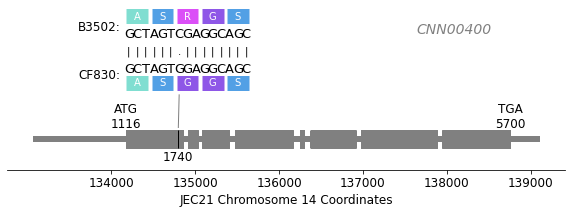

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,3))
fig.set_facecolor('w')

## Plot gene body
plt.hlines(0,irk7.Zeropos.min(),irk7.Zeropos.max(),
           color='grey',linewidth=6);

## Plot introns
#cds = irk7[(irk7.Type==0)]
for i,j in cds.iterrows():
    plt.vlines(j.Zeropos,-1,1,color='grey',alpha=1,linewidth=1)
    
## Plot variants  
gvs = irk7[(irk7.Isvar==1)]
for i,j in gvs.iterrows():
    if j.Ref!=j.Alt:
        plt.vlines(j.Zeropos,-1,1,color='k',linewidth=1)
        
## Plot sequences        
x = 1150
ys = 0.7
y1 = 8
y2 = y1+2.5
tw = 100
xpad = 30

plotpos = []
for i,(ri,p) in enumerate(to_plot.iterrows()):
    
    xp = x+(i*tw)
    plotpos.append(xp)
    plt.text(xp,y=y1+ys,s=Seq(p.Ref),
             fontsize=13,
             color='k',
             va='top',ha='center')
    
    plt.text(xp,y=y2+ys,s=Seq(p.Alt),
             fontsize=13,
             color='k',
             va='bottom',ha='center')
    
    plt.text(xp,y=(y1+((y2-y1)/2))+ys+0.02,
             s='|' if p.Alt==p.Ref else '.',
             fontsize=10,
             color='k',
             va='center',ha='center')

for i,a in enumerate(to_plot.Refaa.values[1::3]):

    plt.hlines(y1-1.6,plotpos[::3][i]-xpad,
               plotpos[2::3][i]+xpad,
               linewidth=15,alpha=0.75,
               color=aadf[(aadf.AA==a)].Color)
    plt.text(plotpos[1::3][i],y=y1-1.6,s=a,
             color='w',va='center',ha='center')
    
for i,a in enumerate(to_plot.Altaa.values[1::3]):

    plt.hlines(y2+3.4,plotpos[::3][i]-xpad,
               plotpos[2::3][i]+xpad,
               linewidth=15,alpha=0.75,
               color=aadf[(aadf.AA==a)].Color)
    plt.text(plotpos[1::3][i],y=y2+3.4,s=a,
             color='w',va='center',ha='center')
    
x_xp,x_xl = plt.xticks()
pos = irk7[(irk7.Zeropos.isin(x_xp[(x_xp>=500) & 
          (x_xp<=irk7.Zeropos.max())]))].Pos.values
zeropos = irk7[(irk7.Zeropos.isin(x_xp[(x_xp>=500) & 
          (x_xp<=irk7.Zeropos.max())]))].Zeropos.values

newxmod = int(str(pos[0])[-2:])

plt.xticks(zeropos-newxmod , pos-newxmod ,fontsize=12)
plt.xlabel('JEC21 Chromosome 14 Coordinates',fontsize=12)

plt.text(start_pos+1,2.5,'ATG\n%s'%start_pos,va='center',ha='center',fontsize=12)
plt.text(end_pos-1,2.5,'TGA\n%s'%end_pos,va='center',ha='center',fontsize=12)

plt.ylim(-3.5,15);



## Turn off top, left and right spines
[ax.spines[a].set_visible(False) for a in ['top','left','right']]
plt.yticks([])

plt.text(800,y1,'CF830:',fontsize=12,va='top',ha='center')
plt.text(800,y2+1.5,'B3502:',fontsize=12,va='bottom',ha='center')

plt.text(1740,-2,'1740',va='center',ha='center',fontsize=12)

plt.plot([1740,1750],[1.3,y1-3],color='k',alpha=0.5,linewidth=1)

plt.title('CNN00400',x=0.8,y=0.8,fontstyle='italic',color='grey',fontsize=14)

plt.savefig('../FIGURES/CNN00400_IRK7_B3502.png',
            dpi=400,bbox_inches='tight');

In [16]:
assert np.max([np.unique([len(a) for a in irk7.Ref]),np.unique([len(a) for a in irk7.Alt])])==1

In [17]:
irk7[(irk7.Isvar!=0)]

,Pos,Ref,Alt,Isvar,Strand,Type,Phase,Gene,Sample,Zeropos
0,134798,G,C,1,1,0,0,CNN00400-t26_1,Stock3,1740
